In [1]:
# uncomment the immediate line below and run the cell to create 'requirements.txt'. ignore if already done
# !pipreqs

# CLI command to generate requirements.txt file automatically based on the dependencies and their respective versions

INFO: Successfully saved requirements file in /Users/thilakcm/Downloads/coding files/kfx Internship work/requirements.txt


# Import all dependencies

In [3]:
# librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.
import librosa
# Librosa is used instead of scipy because it enables standardisation of values whereas scipy does not
# for ex: all the audio files are brought down to 21KHz sampling rate if they are at 42KHz, thus standardising the values
# it also normalizes your audio files in the way that it makes all the amplitudes from -1 to 1
import librosa.display
from scipy.io import wavfile as wav # unused
# for visualisations
import matplotlib.pyplot as plt
# for dataframe creation and manipulation
import pandas as pd
# for algebraic calculations
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Exploratory Data Analysis

Text(0, 0.5, 'Amplitude')

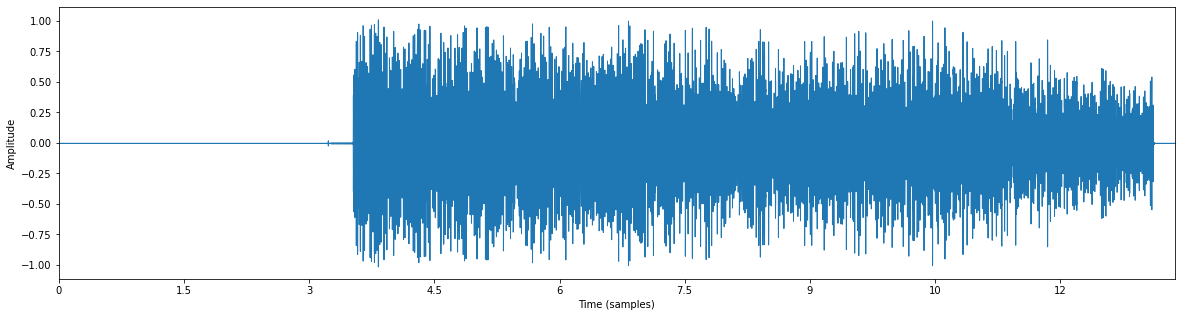

In [19]:
# Import one audio sample and visualise it.
# For context, the audio samples are saved in a folder 'vibration sounds with labels' in the same directory as this ipynb file.
# Within this folder are all the data samples, such as arching.wav and tracking.wav

audio_file = "vibration sounds with labels/tracking.wav"
data, sample_rate = librosa.load(audio_file)
plt.figure(figsize=(20,5)) # set size of visualization
librosa.display.waveplot(data, sr= sample_rate)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

In [20]:
# Print the sampling frequency of the audio file
print('The sampling frequency is: ' + str(sample_rate) + ' Hz')

The sampling frequency is: 22050 Hz


Text(0, 0.5, 'Frequency')

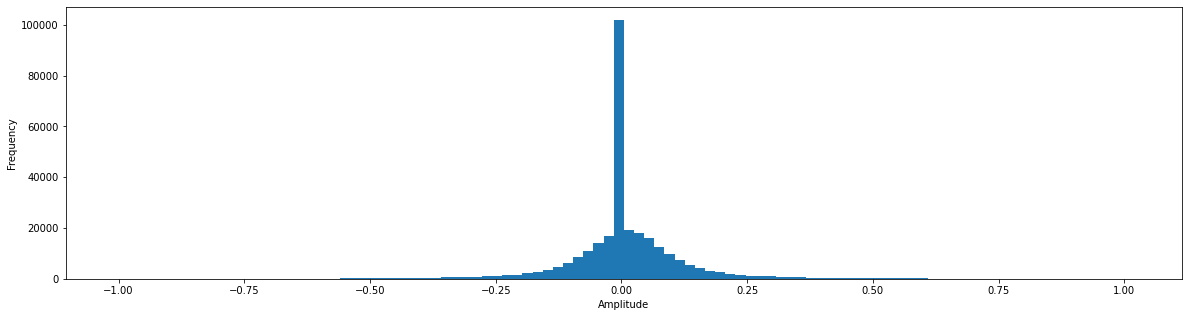

In [21]:
# Histogram plot of audio sample

plt.figure(figsize=(20,5))
plt.hist(data, bins=100)
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
# most of the values are close to 0

# Feature Extraction on one sample audio file

## Mel-frequency cepstral coefficients (MFCCs)

In [22]:
# MFCCs are a feature set that is used to represent the sound of a sound signal.

mfccs = librosa.feature.mfcc(y = data, sr = sample_rate, n_mfcc=40)
# the parameter n_mfcc [int > 0][scalar]: number of MFCCs to return
mfccs.shape

(20, 577)

### The reason we have 535 different sets of 40 values is because of the length of the audio sample. 

In [17]:
# Viewing features generated via mfcc
mfccs[0]

array([-731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.6604  ,
       -731.6604  , -731.6604  , -731.6604  , -731.6604  , -731.

# Feature extraction on all audio files

### Mel-Frequency Cepstrum Coefficients (MFCC): used for music information retrieval

In [23]:
# Function to extract features from audio samples
# The function takes in the path of the audio file as an argument.
# The features are the mean of the MFCCs for each audio sample.
# They are scaled to have a mean of 0 and a standard deviation of 1 .
# Then they are then returned as a numpy array.

def feature_extractor(file):
    audio, s_r = librosa.load(file)
    mfcc_feat = librosa.feature.mfcc(y=audio, sr = s_r, n_mfcc=40)
    mfcc_scaled_feat = np.mean(mfcc_feat.T, axis=0)
    return mfcc_scaled_feat

In [24]:
# Output labels
# The labels are essentially the names of the audio samples
labels = ['arching', 'bad bearing', 'good bearing', 'corona', 'over lubrication', 'under lubrication', 'tracking', 'slow speed bearing']

In [25]:
# This cell takes about 10 seconds
# Extracting features from all the audio samples
extracted_feat = []
for i in labels:
    file_path = 'vibration sounds with labels/' + i + ".wav"
    data = feature_extractor(file_path)
    extracted_feat.append(data)

In [26]:
len(extracted_feat)
# it is 8 since we have that many audio files

8

In [27]:
# Show a sample of the extracted features along with its corresponding label
print(str(str(labels[0]) + " : " + str(extracted_feat[0])))

arching : [-3.76647217e+02  1.11728088e+02 -1.08013405e+02  6.28635063e+01
 -1.53423338e+01 -8.27809715e+00  2.63332615e+01 -2.13929386e+01
  1.26838751e+01  2.02865437e-01 -1.21658764e+01  6.66787624e+00
 -6.06978369e+00  2.14926600e+00  5.71262956e-01 -5.71654797e+00
  1.20737660e+00  2.09113806e-01 -2.94031918e-01 -3.30337501e+00
 -2.08324647e+00  6.80803537e-01 -6.44732380e+00 -1.94633555e+00
 -1.12862635e+00 -5.10450792e+00  1.25184035e+00 -3.54756570e+00
 -3.48855996e+00  4.76496124e+00 -1.73018038e+00 -1.96035117e-01
  2.89899015e+00  1.76264668e+00  2.28928208e+00 -1.45942736e+00
  2.47394633e+00  9.08398449e-01 -2.57030630e+00  9.28938091e-01]


In [28]:
# Create a pandas dataframe
# The dataframe has the features as columns and the labels as rows
data = {'Features':extracted_feat,
        'Class':labels}
df = pd.DataFrame(data)

In [29]:
# Display dataframe
df = df.convert_dtypes()
df

,Features,Class
0,"[-376.64722, 111.72809, -108.013405, 62.863506...",arching
1,"[-72.81148, 71.61577, -52.513206, 17.781002, -...",bad bearing
2,"[-75.45644, 37.54906, -36.372437, 28.302319, -...",good bearing
3,"[-438.1584, 155.8144, -114.37731, 67.577675, -...",corona
4,"[-190.22328, 48.823795, -55.06856, 3.6596546, ...",over lubrication
5,"[-191.03474, 38.13503, -68.621284, 16.255236, ...",under lubrication
6,"[-333.43558, 188.37671, -114.26606, -16.512941...",tracking
7,"[-278.97263, 53.50346, -96.42466, 40.757355, -...",slow speed bearing


In [30]:
# Check some basic info on the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Features  8 non-null      object
 1   Class     8 non-null      string
dtypes: object(1), string(1)
memory usage: 256.0+ bytes


In [31]:
# Initialise instances of RandomForestClassifier and XGBClassifier
rf = RandomForestClassifier()
xgb = XGBClassifier()

In [32]:
# Create input and output arrays
# The input array is the features and the output array is the labels
X = df['Features'].tolist()
y = df['Class'].tolist()

In [33]:
# Fit the model
# The model is trained on the input array and the output array
rf.fit(X, y)

RandomForestClassifier()

In [34]:
# Check the accuracy of the model
# The accuracy is calculated by comparing the predicted labels with the actual labels
rf.score(X,y)

1.0

In [35]:
# Make prediction using the trained model
rf.predict([[-2.7897263e+02,  5.3503460e+01, -9.6424660e+01,  4.0757355e+01,
       -9.3860197e+00, -2.6315546e+01,  8.7640753e+00, -1.0260286e+01,
       -2.2516959e+00, -3.5593541e+00, -2.6005332e+00,  4.4261584e+00,
       -8.3459091e+00,  7.4399757e+00, -5.6521006e+00, -1.1300085e+00,
        2.3042479e+00, -2.6922553e+00,  3.4631615e+00, -3.1675118e-01,
       -2.9012849e+00,  1.5472490e+00, -4.7382765e+00,  2.7978785e+00,
       -1.6362865e+00,  4.0778139e-01,  4.0807822e-01, -1.1660991e+00,
        1.2589860e+00, -4.4920674e-01,  3.4972721e-01,  2.8618410e+00,
       -2.9334219e+00,  1.2352990e+00, -9.3883562e-01,  1.1288710e+00,

        9.5385534e-01, -8.9366227e-01, -4.7920844e-01, -1.4678799e-01]])[0]

'slow speed bearing'

In [36]:
# To confirm if the prediction is correct in above cell
print(labels[7])
extracted_feat[7]

slow speed bearing


array([-2.7897263e+02,  5.3503460e+01, -9.6424660e+01,  4.0757355e+01,
       -9.3860197e+00, -2.6315546e+01,  8.7640753e+00, -1.0260286e+01,
       -2.2516959e+00, -3.5593541e+00, -2.6005332e+00,  4.4261584e+00,
       -8.3459091e+00,  7.4399757e+00, -5.6521006e+00, -1.1300085e+00,
        2.3042479e+00, -2.6922553e+00,  3.4631615e+00, -3.1675118e-01,
       -2.9012849e+00,  1.5472490e+00, -4.7382765e+00,  2.7978785e+00,
       -1.6362865e+00,  4.0778139e-01,  4.0807822e-01, -1.1660991e+00,
        1.2589860e+00, -4.4920674e-01,  3.4972721e-01,  2.8618410e+00,
       -2.9334219e+00,  1.2352990e+00, -9.3883562e-01,  1.1288710e+00,
        9.5385534e-01, -8.9366227e-01, -4.7920844e-01, -1.4678799e-01],
      dtype=float32)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------